In [2]:
#modelv2ensemble
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Concatenate,Input,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import load_model , Model,Sequential
import tensorflow_addons as tfa
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
if tf.test.gpu_device_name():
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
img_augmentation = Sequential(
    [
        layers.RandomFlip(mode="horizontal_and_vertical"),
        layers.RandomRotation(factor=0.1),
        layers.RandomTranslation(height_factor=0.3, width_factor=0.3),
    ],
    name="img_augmentation",
)
image_size=(380,380)
batch_size=16
val_ds =  image_dataset_from_directory(
    directory="H:\\article\\1\\valid",
    image_size=image_size,
    batch_size=batch_size,
)

test_ds = image_dataset_from_directory(
    directory="H:\\article\\1\\test", # Updated directory path
    image_size=image_size,
    batch_size=batch_size,
)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12418021503131151321
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7533969408
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17035716747329061988
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:41:00.0, compute capability: 8.6"
xla_global_id: 416903419
]
Num GPUs Available:  1
Default GPU Device:/device:GPU:0
Found 1182 files belonging to 2 classes.
Found 1182 files belonging to 2 classes.


In [3]:

#v2
input_modelv2b0 = load_model("C:\\Users\\Arisa\\Desktop\\article\\modelstrainedv2test1-701515\\efficientnetv2b0best.h5")
input_modelv2b1 = load_model("C:\\Users\\Arisa\\Desktop\\article\\modelstrainedv2test1-701515\\efficientnetv2b1best.h5")
input_modelv2b2 = load_model("C:\\Users\\Arisa\\Desktop\\article\\modelstrainedv2test1-701515\\efficientnetv2b2best.h5")
input_modelv2b3 = load_model("C:\\Users\\Arisa\\Desktop\\article\\modelstrainedv2test1-701515\\efficientnetv2b3best.h5")
input_modelv2bS = load_model("C:\\Users\\Arisa\\Desktop\\article\\modelstrainedv2test1-701515\\efficientnetv2bSbest.h5")
modelv2b0 = Model([input_modelv2b0.get_layer("rescaling").input], [input_modelv2b0.get_layer("top_activation").output])
modelv2b1 = Model([input_modelv2b1.get_layer("rescaling_1").input], [input_modelv2b1.get_layer("top_activation").output])
modelv2b2 = Model([input_modelv2b2.get_layer("rescaling_2").input], [input_modelv2b2.get_layer("top_activation").output])
modelv2b3 = Model([input_modelv2b3.get_layer("rescaling_3").input], [input_modelv2b3.get_layer("top_activation").output])
modelv2bS = Model([input_modelv2bS.get_layer("rescaling_4").input], [input_modelv2bS.get_layer("top_activation").output])
del input_modelv2b0 , input_modelv2b1 , input_modelv2b2 , input_modelv2b3 , input_modelv2bS

In [4]:
IMG_SIZE=380
NUM_CLASSES=2
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Input, Reshape, Lambda, Resizing,GlobalAveragePooling2D
from tensorflow.keras.models import Model,save_model
def build_model(num_classes):
    #v1
    inputs = Input(shape=(380, 380, 3))
    x=img_augmentation(inputs)
    v2b0=tf.image.resize (x,(224,224))
    v2b1=tf.image.resize (x,(240,240))
    v2b2=tf.image.resize (x,(260,260))
    v2b3=tf.image.resize (x,(300,300))
    v2bS=x
    #v1
    modelv2b0.trainable = False
    modelv2b1.trainable = False
    modelv2b2.trainable = False
    modelv2b3.trainable = False
    modelv2bS.trainable = False
    #v1
    b0v2=modelv2b0(v2b0)
    b1v2=modelv2b1(v2b1)
    b2v2=modelv2b2(v2b2)
    b3v2=modelv2b3(v2b3)
    bSv2=modelv2bS(v2bS)
    #
    b0v2=GlobalAveragePooling2D()(b0v2)
    b1v2=GlobalAveragePooling2D()(b1v2)
    b2v2=GlobalAveragePooling2D()(b2v2)
    b3v2=GlobalAveragePooling2D()(b3v2)
    bSv2=GlobalAveragePooling2D()(bSv2)


    bbb=Concatenate()([b0v2,b1v2,b2v2,b3v2,bSv2])
    bbb = BatchNormalization()(bbb)
    top_dropout_rate = 0.2
    bbb = layers.Dropout(top_dropout_rate, name="top_dropout111")(bbb)
    bbb = Dense(128, activation='relu')(bbb)
    bbb = BatchNormalization()(bbb)
    top_dropout_rate = 0.2
    bbb = layers.Dropout(top_dropout_rate, name="top_dropout112")(bbb)
    bbb = Dense(32, activation='relu')(bbb)
    bbb = BatchNormalization()(bbb)
    top_dropout_rate = 0.2
    bbb = layers.Dropout(top_dropout_rate, name="top_dropout333")(bbb)

    output = Dense(2, activation='softmax')(bbb)

  
    model = Model(inputs=inputs, outputs=output)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])



    return model
model = build_model(num_classes=NUM_CLASSES)
model.summary()



Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 380, 380, 3  0           []                               
                                )]                                                                
                                                                                                  
 img_augmentation (Sequential)  (None, 380, 380, 3)  0           ['input_6[0][0]']                
                                                                                                  
 tf.image.resize (TFOpLambda)   (None, 224, 224, 3)  0           ['img_augmentation[0][0]']       
                                                                                                  
 tf.image.resize_1 (TFOpLambda)  (None, 240, 240, 3)  0          ['img_augmentation[0][0]'] 

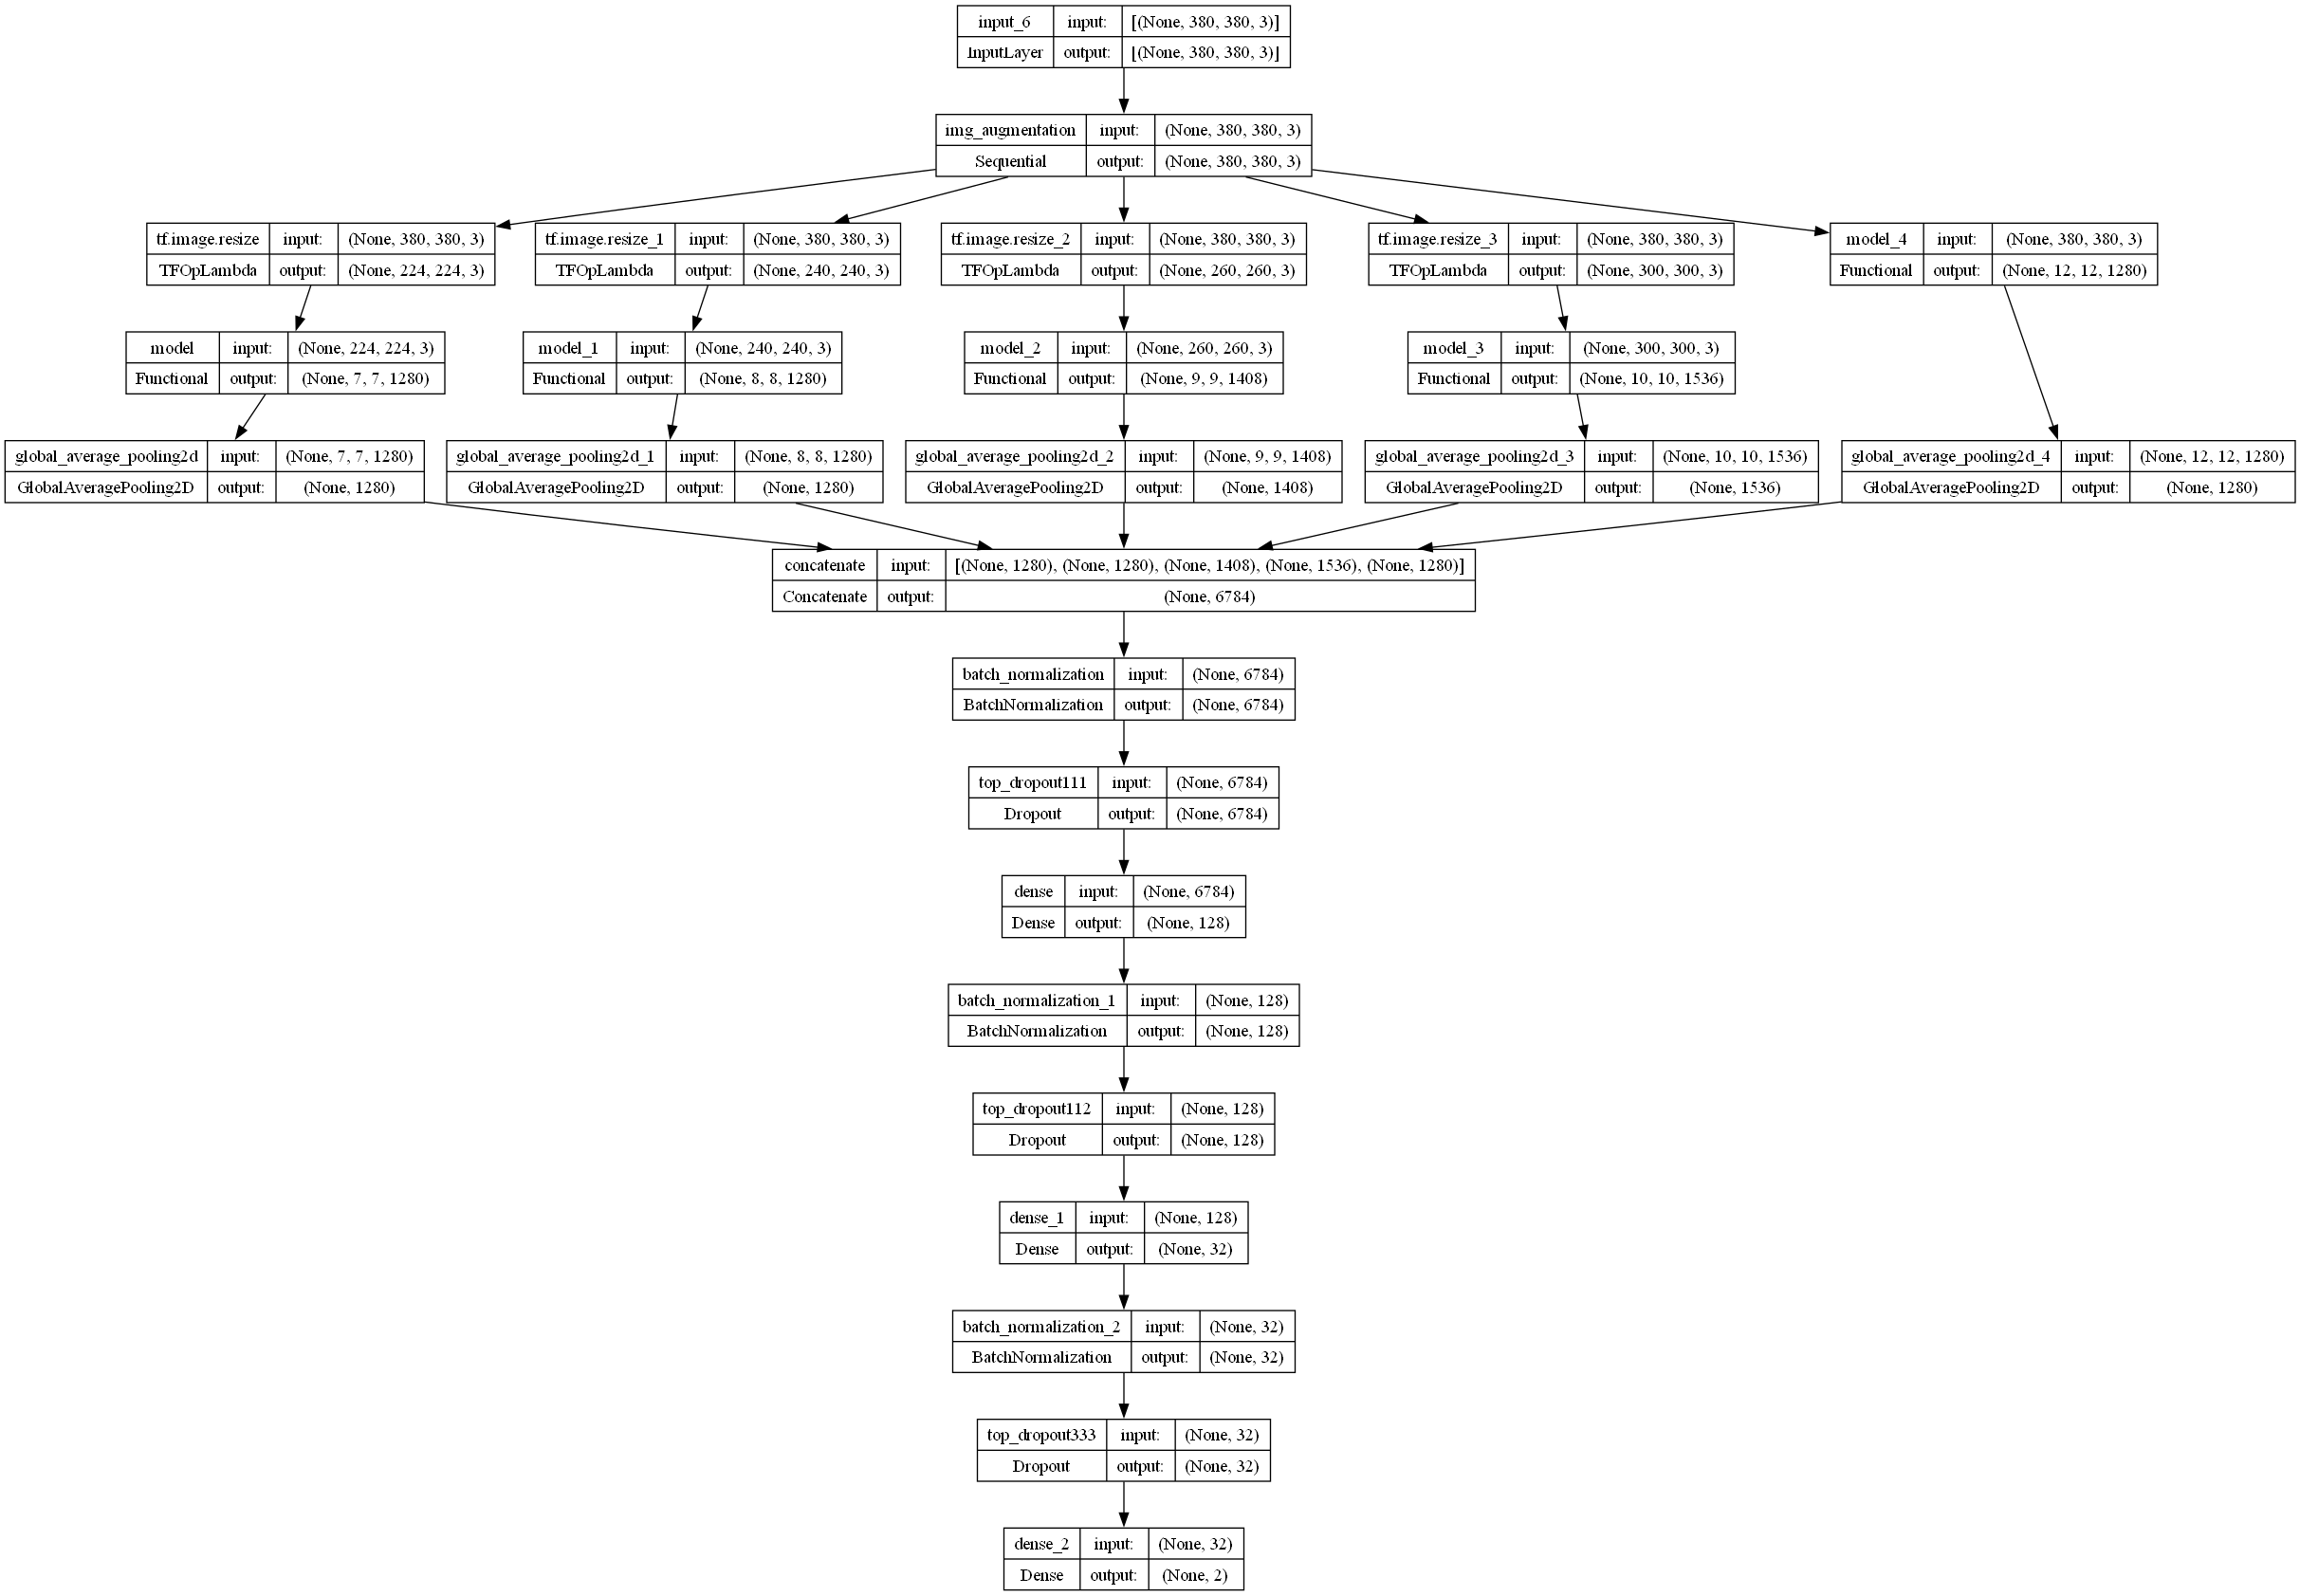

In [5]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plotv2ensemble.png', show_shapes=True, show_layer_names=True)


In [6]:
for layer in model.layers:
    print(layer._name)
    print(layer.trainable)

input_6
True
img_augmentation
True
tf.image.resize
True
tf.image.resize_1
True
tf.image.resize_2
True
tf.image.resize_3
True
model
False
model_1
False
model_2
False
model_3
False
model_4
False
global_average_pooling2d
True
global_average_pooling2d_1
True
global_average_pooling2d_2
True
global_average_pooling2d_3
True
global_average_pooling2d_4
True
concatenate
True
batch_normalization
True
top_dropout111
True
dense
True
batch_normalization_1
True
top_dropout112
True
dense_1
True
batch_normalization_2
True
top_dropout333
True
dense_2
True


In [7]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5,
                              patience=1)
hist=model.fit(val_ds,epochs=40,validation_data=test_ds,callbacks=[reduce_lr])

Epoch 1/40
74/74 [==============================] - 89s 657ms/step - loss: 0.1155 - accuracy: 0.9636 - val_loss: 0.0276 - val_accuracy: 0.9958 - lr: 0.0010
Epoch 2/40
74/74 [==============================] - 39s 523ms/step - loss: 0.0855 - accuracy: 0.9772 - val_loss: 0.0214 - val_accuracy: 0.9949 - lr: 0.0010
Epoch 3/40
74/74 [==============================] - 37s 501ms/step - loss: 0.0435 - accuracy: 0.9873 - val_loss: 0.0186 - val_accuracy: 0.9949 - lr: 0.0010
Epoch 4/40
74/74 [==============================] - 37s 496ms/step - loss: 0.0435 - accuracy: 0.9907 - val_loss: 0.0142 - val_accuracy: 0.9958 - lr: 0.0010
Epoch 5/40
74/74 [==============================] - 37s 497ms/step - loss: 0.0516 - accuracy: 0.9865 - val_loss: 0.0148 - val_accuracy: 0.9966 - lr: 5.0000e-04
Epoch 6/40
74/74 [==============================] - 37s 498ms/step - loss: 0.0295 - accuracy: 0.9924 - val_loss: 0.0138 - val_accuracy: 0.9966 - lr: 2.5000e-04
Epoch 7/40
74/74 [==============================] - 37s 

In [8]:
model.evaluate(test_ds)

74/74 [==============================] - 14s 188ms/step - loss: 0.0179 - accuracy: 0.9958


[0.017933834344148636, 0.9957698583602905]

In [ ]:
model.save("v2test1ensemblemodel.h5")

C:\Users\mahdi\AppData\Roaming\Python\Python310\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Found 1182 files belonging to 2 classes.
74/74 [==============================] - 1591s 21s/step


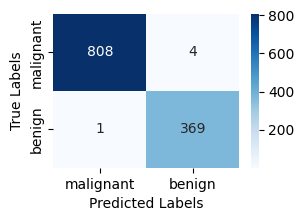


Metrics:
Accuracy: 0.9958
Precision: 0.9988
Recall: 0.9951
F1-Score: 0.9969

Misclassified filenames:
H:\article\1\test\benign\SOB_B_A-14-22549G-200-005.png
H:\article\1\test\malignant\SOB_M_DC-14-3909-100-026.png
H:\article\1\test\malignant\SOB_M_LC-14-15570-400-018.png
H:\article\1\test\malignant\SOB_M_MC-14-10147-200-004.png
H:\article\1\test\malignant\SOB_M_MC-14-18842D-400-009.png


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Concatenate,Input,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import load_model , Model,Sequential
import tensorflow_addons as tfa
from tensorflow.python.client import device_lib
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
model = load_model('H:\\article\\\modelsensembletest1\\v2test1ensemblemodel.h5')
image_size=(380,380)
batch_size=16
test_ds = image_dataset_from_directory(
    directory="H:\\article\\1\\test", 
    image_size=image_size,
    batch_size=batch_size,
    shuffle=False,
)


y_true = np.concatenate([y for x, y in test_ds], axis=0)  
y_pred = model.predict(test_ds)  
y_pred = np.argmax(y_pred, axis=1)  


cm = confusion_matrix(y_true, y_pred)
desired_class_order = ['malignant', 'benign']
current_class_order = test_ds.class_names
order_mapping = [current_class_order.index(cls) for cls in desired_class_order]
cm_reordered = cm[order_mapping, :][:, order_mapping]


plt.figure(figsize=(3, 2))
sns.heatmap(cm_reordered, annot=True, fmt='d', cmap='Blues', 
            xticklabels=desired_class_order, 
            yticklabels=desired_class_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


misclassified_indices = np.where(y_true != y_pred)[0]  


file_paths = test_ds.file_paths  
misclassified_files = [file_paths[i] for i in misclassified_indices]
####
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')

print("\nMetrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


print("\nMisclassified filenames:")
for file in misclassified_files:
    print(file)

{'loss': [0.11552014946937561, 0.08551114797592163, 0.04351792111992836, 0.04353996738791466, 0.05163644999265671, 0.029478706419467926, 0.022398797795176506, 0.017047859728336334, 0.03801507130265236, 0.03152166306972504, 0.029129525646567345, 0.04934312403202057, 0.00950300320982933, 0.020328404381871223, 0.02901606820523739, 0.018152499571442604, 0.014309065416455269, 0.016707487404346466, 0.016534598544239998, 0.018137268722057343, 0.01170999463647604, 0.030410947278141975, 0.016887102276086807, 0.01539462711662054, 0.013573749922215939, 0.04000676050782204, 0.03025140054523945, 0.02099430188536644, 0.016692979261279106, 0.02414107136428356, 0.029335102066397667, 0.014083992689847946, 0.01660844311118126, 0.01988908089697361, 0.015334292314946651, 0.020357836037874222, 0.043117545545101166, 0.015572250820696354, 0.032076556235551834, 0.02729458175599575], 'accuracy': [0.9636209607124329, 0.9771573543548584, 0.9873096346855164, 0.9906937479972839, 0.9864636063575745, 0.9923858046531

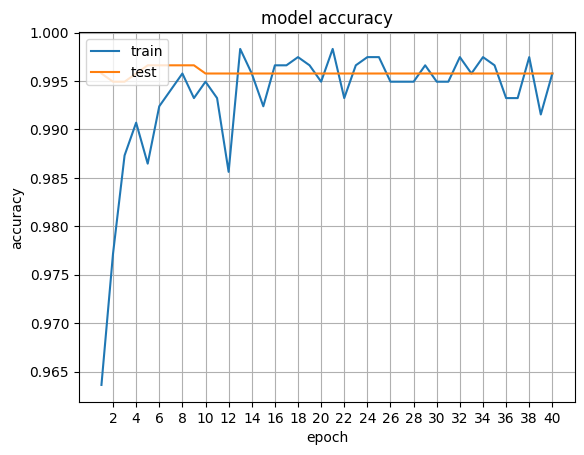

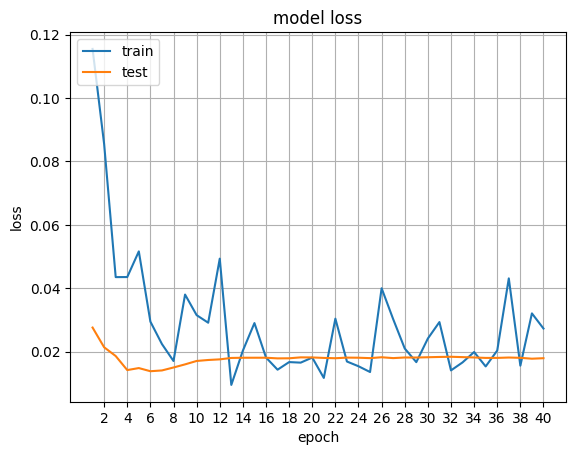

In [14]:
print(hist.history)
import matplotlib.pyplot as plt
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "test"], loc="upper left")
    plt.grid(True)
    plt.xticks(np.arange(len(hist.history["accuracy"])), np.arange(1, len(hist.history["val_accuracy"])+1))
    epochs = range(1, len(hist.history["accuracy"]) + 1)
    plt.xticks(epochs[::2])  
    plt.show()
plot_hist(hist)

def plot_hist(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "test"], loc="upper left")
    plt.grid(True)
    plt.xticks(np.arange(len(hist.history["accuracy"])), np.arange(1, len(hist.history["val_accuracy"])+1))
    epochs = range(1, len(hist.history["accuracy"]) + 1)
    plt.xticks(epochs[::2])  
    plt.show()
plot_hist(hist)


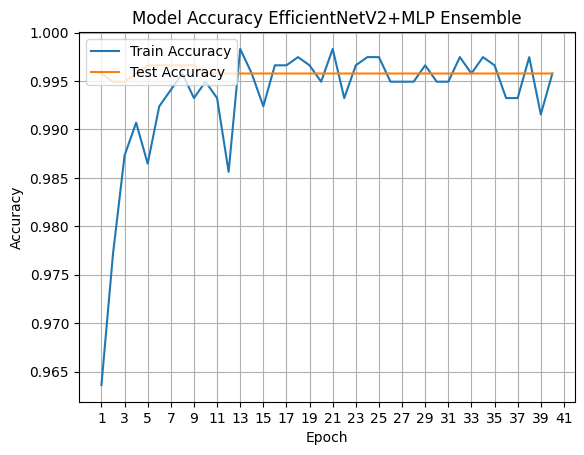

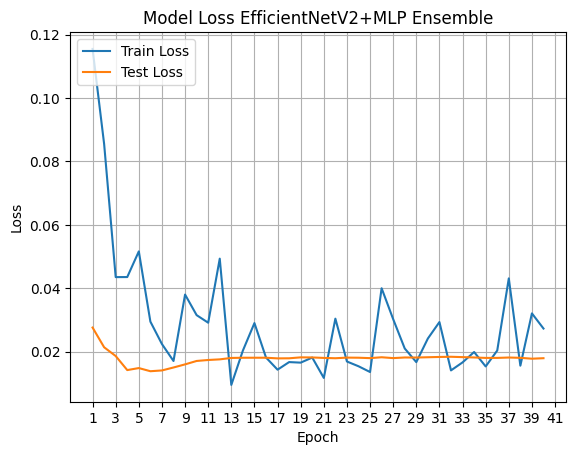

In [1]:
hist={'loss': [0.11552014946937561, 0.08551114797592163, 0.04351792111992836, 0.04353996738791466, 0.05163644999265671, 0.029478706419467926, 0.022398797795176506, 0.017047859728336334, 0.03801507130265236, 0.03152166306972504, 0.029129525646567345, 0.04934312403202057, 0.00950300320982933, 0.020328404381871223, 0.02901606820523739, 0.018152499571442604, 0.014309065416455269, 0.016707487404346466, 0.016534598544239998, 0.018137268722057343, 0.01170999463647604, 0.030410947278141975, 0.016887102276086807, 0.01539462711662054, 0.013573749922215939, 0.04000676050782204, 0.03025140054523945, 0.02099430188536644, 0.016692979261279106, 0.02414107136428356, 0.029335102066397667, 0.014083992689847946, 0.01660844311118126, 0.01988908089697361, 0.015334292314946651, 0.020357836037874222, 0.043117545545101166, 0.015572250820696354, 0.032076556235551834, 0.02729458175599575], 'accuracy': [0.9636209607124329, 0.9771573543548584, 0.9873096346855164, 0.9906937479972839, 0.9864636063575745, 0.9923858046531677, 0.9940778613090515, 0.9957698583602905, 0.9932318329811096, 0.9949238300323486, 0.9932318329811096, 0.9856175780296326, 0.9983079433441162, 0.9957698583602905, 0.9923858046531677, 0.9966158866882324, 0.9966158866882324, 0.9974619150161743, 0.9966158866882324, 0.9949238300323486, 0.9983079433441162, 0.9932318329811096, 0.9966158866882324, 0.9974619150161743, 0.9974619150161743, 0.9949238300323486, 0.9949238300323486, 0.9949238300323486, 0.9966158866882324, 0.9949238300323486, 0.9949238300323486, 0.9974619150161743, 0.9957698583602905, 0.9974619150161743, 0.9966158866882324, 0.9932318329811096, 0.9932318329811096, 0.9974619150161743, 0.9915397763252258, 0.9957698583602905], 'val_loss': [0.027602365240454674, 0.021380795165896416, 0.018619703128933907, 0.014186747372150421, 0.014820235781371593, 0.013825153931975365, 0.014071772806346416, 0.015003601089119911, 0.01598794013261795, 0.017061999067664146, 0.017368612810969353, 0.01756838895380497, 0.018017049878835678, 0.018077995628118515, 0.01808171719312668, 0.01808415725827217, 0.017878586426377296, 0.017905395478010178, 0.018199363723397255, 0.018172092735767365, 0.018024984747171402, 0.01792306825518608, 0.018119866028428078, 0.018086226657032967, 0.01795494556427002, 0.018232611939311028, 0.017963608726859093, 0.01816025748848915, 0.018143976107239723, 0.01823771558701992, 0.018325993791222572, 0.018387189134955406, 0.018273787572979927, 0.018166890367865562, 0.018025236204266548, 0.01802978105843067, 0.018147217109799385, 0.01805488020181656, 0.017777102068066597, 0.017934024333953857], 'val_accuracy': [0.9957698583602905, 0.9949238300323486, 0.9949238300323486, 0.9957698583602905, 0.9966158866882324, 0.9966158866882324, 0.9966158866882324, 0.9966158866882324, 0.9966158866882324, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905], 'lr': [0.001, 0.001, 0.001, 0.001, 0.0005, 0.00025, 0.00025, 0.00025, 0.00025, 0.000125, 6.25e-05, 3.125e-05, 1.5625e-05, 1.5625e-05, 7.8125e-06, 3.90625e-06, 1.953125e-06, 9.765625e-07, 4.882813e-07, 2.4414064e-07, 1.2207032e-07, 6.103516e-08, 3.051758e-08, 1.525879e-08, 7.629395e-09, 3.8146974e-09, 1.9073487e-09, 9.536744e-10, 4.768372e-10, 2.384186e-10, 1.192093e-10, 5.960465e-11, 2.9802324e-11, 1.4901162e-11, 7.450581e-12, 3.7252905e-12, 1.8626452e-12, 9.313226e-13, 4.656613e-13, 2.3283065e-13]}
import matplotlib.pyplot as plt
def plot_accuracy(hist):
    epochs = range(1, len(hist['accuracy']) + 1)  
    plt.plot(epochs, hist['accuracy'], label='Train Accuracy')
    plt.plot(epochs, hist['val_accuracy'], label='Test Accuracy')
    plt.title('Model Accuracy EfficientNetV2+MLP Ensemble')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(range(1, 42, 2)) 
    plt.show()


def plot_loss(hist):
    epochs = range(1, len(hist['loss']) + 1)
    plt.plot(epochs, hist['loss'], label='Train Loss')
    plt.plot(epochs, hist['val_loss'], label='Test Loss')
    plt.title('Model Loss EfficientNetV2+MLP Ensemble')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(range(1, 42, 2))  
    plt.show()
plot_accuracy(hist)
plot_loss(hist)

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
def grad_cam(input_model, image, layer_name):
    img_arr = tf.keras.preprocessing.image.img_to_array(image)
    x = img_arr[tf.newaxis]
    x = tf.keras.applications.efficientnet_v2.preprocess_input(x)

    grad_model = tf.keras.models.Model([input_model.inputs], [input_model.get_layer(layer_name).get_output_at(0), input_model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(x)
        class_idx = np.argmax(predictions[0])
        loss = predictions[:, class_idx]


    output = conv_outputs[0]
    grads = tape.gradient(loss, conv_outputs)[0]

    gate_f = tf.cast(output > 0, 'float32')
    gate_r = tf.cast(grads > 0, 'float32')

    guided_grads = gate_f * gate_r * grads

    weights = np.mean(guided_grads, axis=(0, 1))
    cam = np.dot(output, weights)

    cam = cv2.resize(cam, (x.shape[1], x.shape[2]), cv2.INTER_LINEAR)

    cam  = np.maximum(cam, 0)

    heatmap = cam / cam.max()


    jet_cam = cv2.applyColorMap(np.uint8(255.0*heatmap), cv2.COLORMAP_JET)

    rgb_cam = np.float32(cv2.cvtColor(jet_cam, cv2.COLOR_BGR2RGB))
    output_arr = cv2.addWeighted(src1=img_arr, alpha=0.7, src2=rgb_cam, beta=0.3, gamma=0)
    output_image = tf.keras.preprocessing.image.array_to_img(output_arr)

    return output_image

In [2]:
import os
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Concatenate,Input,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import load_model 
import tensorflow_addons as tfa
from tensorflow.python.client import device_lib
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
model = load_model('H:\\article\\\modelsensembletest1\\v2test1ensemblemodel.h5')
image_size=(380,380)
batch_size=16
model.summary()

C:\Users\mahdi\AppData\Roaming\Python\Python310\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 380, 380, 3  0           []                               
                                )]                                                                
                                                                                                  
 img_augmentation (Sequential)  (None, 380, 380, 3)  0           ['input_6[0][0]']                
                                                                                                  
 tf.image.resize (TFOpLambda)   (None, 224, 224, 3)  0           ['img_augmentation[0][0]']       
                                                                                                  
 tf.image.resize_1 (TFOpLambda)  (None, 240, 240, 3)  0          ['img_augmentation[0][0]'] 

In [ ]:
'H:\\article\\1\\test\\benign\\SOB_B_A-14-22549G-200-005.png'
'H:\\article\\1\\test\\malignant\\SOB_M_DC-14-3909-100-026.png'
'H:\\article\\1\test\\malignant\\SOB_M_LC-14-15570-400-018.png'
'H:\\article\\1\\test\\malignant\\SOB_M_MC-14-10147-200-004.png'
'H:\\article\\1\\test\\malignant\\SOB_M_MC-14-18842D-400-009.png'


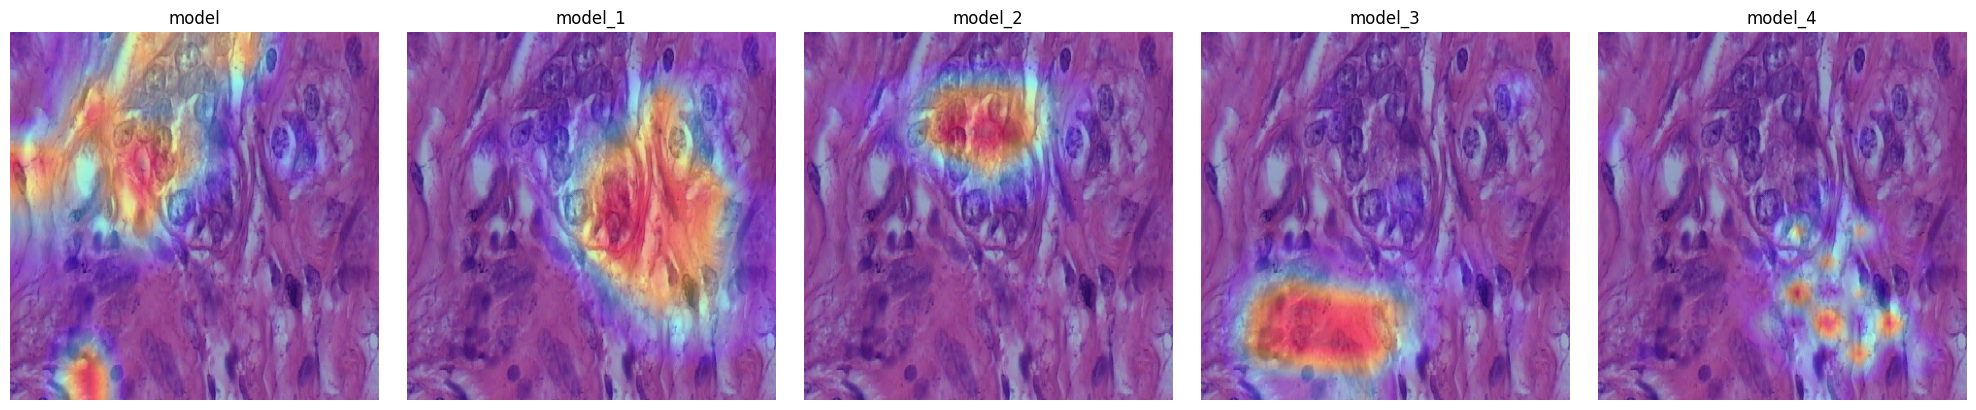

In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf

img_path = 'H:\\article\\1\\test\\benign\\SOB_B_F-14-29960AB-400-001.png'
img_pil = tf.keras.preprocessing.image.load_img(img_path, target_size=(380, 380))


outputs = []


for model_name in ['model', 'model_1', 'model_2', 'model_3', 'model_4']:
    output_image = grad_cam(model, img_pil, model_name)
    outputs.append(output_image)


fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for ax, output_image, model_name in zip(axes, outputs, ['model', 'model_1', 'model_2', 'model_3', 'model_4']):
    ax.imshow(output_image)
    ax.set_title(model_name)
    ax.axis('off') 

plt.tight_layout()
plt.show()


In [2]:
histensemblev1={'loss': [0.15830358862876892, 0.10288003832101822, 0.07046561688184738, 0.04586296156048775, 0.07653762400150299, 0.04203937575221062, 0.061005834490060806, 0.03498159348964691, 0.038043662905693054, 0.040049709379673004, 0.02375548705458641, 0.035976018756628036, 0.04640953242778778, 0.024572301656007767, 0.05340488255023956, 0.03380626067519188, 0.04590143263339996, 0.0271329116076231, 0.023297853767871857, 0.023193545639514923, 0.022335601970553398, 0.04044125974178314, 0.022738683968782425, 0.030067618936300278, 0.03615112602710724, 0.0345318578183651, 0.03329447656869888, 0.028833653777837753, 0.024085359647870064, 0.026691049337387085, 0.039505861699581146, 0.02957867458462715, 0.030184205621480942, 0.03823624923825264, 0.028432974591851234, 0.036136701703071594, 0.03631119802594185, 0.02829323522746563, 0.04221510887145996, 0.0399053655564785], 'accuracy': [0.9475465416908264, 0.9754652976989746, 0.9780033826828003, 0.9873096346855164, 0.9788494110107422, 0.9856175780296326, 0.9890016913414001, 0.9873096346855164, 0.9864636063575745, 0.9906937479972839, 0.9915397763252258, 0.9906937479972839, 0.9873096346855164, 0.9940778613090515, 0.9864636063575745, 0.9890016913414001, 0.9873096346855164, 0.9923858046531677, 0.9932318329811096, 0.9940778613090515, 0.9940778613090515, 0.9864636063575745, 0.9966158866882324, 0.9923858046531677, 0.9923858046531677, 0.989847719669342, 0.9923858046531677, 0.9932318329811096, 0.9949238300323486, 0.9940778613090515, 0.9890016913414001, 0.989847719669342, 0.9923858046531677, 0.9906937479972839, 0.9923858046531677, 0.9890016913414001, 0.9890016913414001, 0.9915397763252258, 0.9890016913414001, 0.9940778613090515], 'val_loss': [0.03293049335479736, 0.032099105417728424, 0.023965254426002502, 0.02125006541609764, 0.019181562587618828, 0.017718395218253136, 0.01676345244050026, 0.016664015129208565, 0.01890779472887516, 0.019154386594891548, 0.01918536238372326, 0.01922309771180153, 0.01947687938809395, 0.019566232338547707, 0.01967143453657627, 0.01958450861275196, 0.01970711722970009, 0.019676316529512405, 0.019637174904346466, 0.019648505374789238, 0.01958354376256466, 0.01970350183546543, 0.0194989200681448, 0.019511954858899117, 0.019710110500454903, 0.01982221193611622, 0.019792906939983368, 0.019699787721037865, 0.019677551463246346, 0.019780131056904793, 0.019668029621243477, 0.019582634791731834, 0.01970287784934044, 0.019729511812329292, 0.019563376903533936, 0.01951940357685089, 0.019497815519571304, 0.019366443157196045, 0.01963391900062561, 0.0194301288574934], 'val_accuracy': [0.9923858046531677, 0.9932318329811096, 0.9932318329811096, 0.9949238300323486, 0.9949238300323486, 0.9949238300323486, 0.9949238300323486, 0.9932318329811096, 0.9940778613090515, 0.9940778613090515, 0.9940778613090515, 0.9940778613090515, 0.9940778613090515, 0.9940778613090515, 0.9940778613090515, 0.9940778613090515, 0.9949238300323486, 0.9949238300323486, 0.9940778613090515, 0.9940778613090515, 0.9940778613090515, 0.9949238300323486, 0.9940778613090515, 0.9949238300323486, 0.9940778613090515, 0.9949238300323486, 0.9949238300323486, 0.9949238300323486, 0.9949238300323486, 0.9940778613090515, 0.9940778613090515, 0.9949238300323486, 0.9949238300323486, 0.9940778613090515, 0.9940778613090515, 0.9949238300323486, 0.9949238300323486, 0.9949238300323486, 0.9949238300323486, 0.9949238300323486], 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.0005, 0.0005, 0.00025, 0.00025, 0.000125, 6.25e-05, 6.25e-05, 3.125e-05, 1.5625e-05, 7.8125e-06, 3.90625e-06, 1.953125e-06, 9.765625e-07, 4.882813e-07, 4.882813e-07, 4.882813e-07, 4.882813e-07, 2.4414064e-07, 1.2207032e-07, 6.103516e-08, 3.051758e-08, 1.525879e-08, 7.629395e-09, 3.8146974e-09, 1.9073487e-09, 9.536744e-10, 4.768372e-10, 2.384186e-10, 1.192093e-10, 5.960465e-11, 2.9802324e-11, 1.4901162e-11, 7.450581e-12, 3.7252905e-12, 1.8626452e-12]}
histensemblev2={'loss': [0.11552014946937561, 0.08551114797592163, 0.04351792111992836, 0.04353996738791466, 0.05163644999265671, 0.029478706419467926, 0.022398797795176506, 0.017047859728336334, 0.03801507130265236, 0.03152166306972504, 0.029129525646567345, 0.04934312403202057, 0.00950300320982933, 0.020328404381871223, 0.02901606820523739, 0.018152499571442604, 0.014309065416455269, 0.016707487404346466, 0.016534598544239998, 0.018137268722057343, 0.01170999463647604, 0.030410947278141975, 0.016887102276086807, 0.01539462711662054, 0.013573749922215939, 0.04000676050782204, 0.03025140054523945, 0.02099430188536644, 0.016692979261279106, 0.02414107136428356, 0.029335102066397667, 0.014083992689847946, 0.01660844311118126, 0.01988908089697361, 0.015334292314946651, 0.020357836037874222, 0.043117545545101166, 0.015572250820696354, 0.032076556235551834, 0.02729458175599575], 'accuracy': [0.9636209607124329, 0.9771573543548584, 0.9873096346855164, 0.9906937479972839, 0.9864636063575745, 0.9923858046531677, 0.9940778613090515, 0.9957698583602905, 0.9932318329811096, 0.9949238300323486, 0.9932318329811096, 0.9856175780296326, 0.9983079433441162, 0.9957698583602905, 0.9923858046531677, 0.9966158866882324, 0.9966158866882324, 0.9974619150161743, 0.9966158866882324, 0.9949238300323486, 0.9983079433441162, 0.9932318329811096, 0.9966158866882324, 0.9974619150161743, 0.9974619150161743, 0.9949238300323486, 0.9949238300323486, 0.9949238300323486, 0.9966158866882324, 0.9949238300323486, 0.9949238300323486, 0.9974619150161743, 0.9957698583602905, 0.9974619150161743, 0.9966158866882324, 0.9932318329811096, 0.9932318329811096, 0.9974619150161743, 0.9915397763252258, 0.9957698583602905], 'val_loss': [0.027602365240454674, 0.021380795165896416, 0.018619703128933907, 0.014186747372150421, 0.014820235781371593, 0.013825153931975365, 0.014071772806346416, 0.015003601089119911, 0.01598794013261795, 0.017061999067664146, 0.017368612810969353, 0.01756838895380497, 0.018017049878835678, 0.018077995628118515, 0.01808171719312668, 0.01808415725827217, 0.017878586426377296, 0.017905395478010178, 0.018199363723397255, 0.018172092735767365, 0.018024984747171402, 0.01792306825518608, 0.018119866028428078, 0.018086226657032967, 0.01795494556427002, 0.018232611939311028, 0.017963608726859093, 0.01816025748848915, 0.018143976107239723, 0.01823771558701992, 0.018325993791222572, 0.018387189134955406, 0.018273787572979927, 0.018166890367865562, 0.018025236204266548, 0.01802978105843067, 0.018147217109799385, 0.01805488020181656, 0.017777102068066597, 0.017934024333953857], 'val_accuracy': [0.9957698583602905, 0.9949238300323486, 0.9949238300323486, 0.9957698583602905, 0.9966158866882324, 0.9966158866882324, 0.9966158866882324, 0.9966158866882324, 0.9966158866882324, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905, 0.9957698583602905], 'lr': [0.001, 0.001, 0.001, 0.001, 0.0005, 0.00025, 0.00025, 0.00025, 0.00025, 0.000125, 6.25e-05, 3.125e-05, 1.5625e-05, 1.5625e-05, 7.8125e-06, 3.90625e-06, 1.953125e-06, 9.765625e-07, 4.882813e-07, 2.4414064e-07, 1.2207032e-07, 6.103516e-08, 3.051758e-08, 1.525879e-08, 7.629395e-09, 3.8146974e-09, 1.9073487e-09, 9.536744e-10, 4.768372e-10, 2.384186e-10, 1.192093e-10, 5.960465e-11, 2.9802324e-11, 1.4901162e-11, 7.450581e-12, 3.7252905e-12, 1.8626452e-12, 9.313226e-13, 4.656613e-13, 2.3283065e-13]}


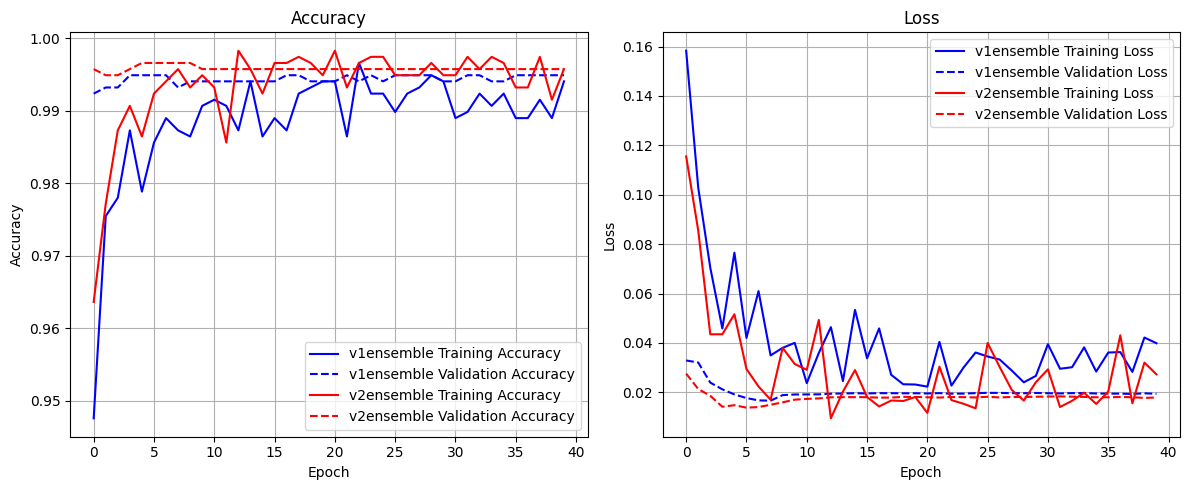

In [5]:
import matplotlib.pyplot as plt
histories = [histensemblev1, histensemblev2]
network_names = ['v1ensemble','v2ensemble']
colors = ['b',  'r']  
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for i, hist in enumerate(histories):
    plt.plot(hist['accuracy'], label=f'{network_names[i]} Training Accuracy', color=colors[i], linestyle='-')
    plt.plot(hist['val_accuracy'], label=f'{network_names[i]} Validation Accuracy', color=colors[i], linestyle='--')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
# Plot training and validation loss
plt.subplot(1, 2, 2)
for i, hist in enumerate(histories):
    plt.plot(hist['loss'], label=f'{network_names[i]} Training Loss', color=colors[i], linestyle='-')
    plt.plot(hist['val_loss'], label=f'{network_names[i]} Validation Loss', color=colors[i], linestyle='--')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()